# Problem Set 1, due April 13th at 3:30pm 

### Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__ )

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.3 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Mapltolib version:     2.0.0 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


## About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

## Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
flights_df.dest.unique()
flights_df.head(20)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1 - Exploring NYC - SEA Flights
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

#### (a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Number of NYC to SEA Flights
print('Number of flights' ,len(flights_df[flights_df.dest =='SEA']))



Number of flights 3923


#### Answer
There were 3923 flights from NYC to SEA in 2013 

#### (b) How many airlines fly from NYC to Seattle?

In [7]:
#Carriers that fly from NYC to SEA
sea_df = flights_df[flights_df.dest =='SEA']
sea_df['carrier'].value_counts()

DL    1213
UA    1117
AS     714
B6     514
AA     365
Name: carrier, dtype: int64

#### Answer
*5* carriers fly from NYC to SEA.
(Delta, United, Alaska, Jet Blue Airlines, American Airlines)

#### (c) How many unique air planes fly from NYC to Seattle?

In [8]:
#Can do previous value_counts() method, but let's try another way
#len(sea_df['tailnum'].value_counts()) - Doesn't count blanks, discards them = 935
#len(sea_df['tailnum'].unique())       - Counts blanks as unique, so dangerous! =936    

sea_df['tailnum'].nunique()           

935

*935* unique air planes (tail numbers) from NYC to SEA when discounting blanks. When using len(df.col.unique()), we got 936 flights.

#### (d) What is the average arrival delay for flights from NYC to Seattle?

In [9]:
#Mean arrival delay for NYC to SEA
sea_df['arr_delay'].mean()

-1.0990990990990992

#### Answer
Flights from NYC to SEA arrive, on average, *1.099* minutes earlier than scheduled.

#### (e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
#Splitting Flights to Seattle based on Origin
sum_sea_df = sea_df['origin'].value_counts()  
sum_sea_df = sum_sea_df / len(sea_df)
sum_sea_df

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64

#### Answer
JFK    53.33 % of flights to Seattle come from JFK airport (JFK), and 46.67% from Newark (EWR). There are no flights from LaGuardia (LGA) to Seattle.

## Question 2 - Exploring Flight Delays
Flights are often delayed. Consider the following questions exploring delay patterns.

#### (a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
# Group flights by Year, Month, Day
daily_df= flights_df.ix[:, ['year','month','day','dep_delay','arr_delay']]
daily_df = daily_df.groupby(['year','month','day']).mean()

#Largest Avg Departure & Arrival Delay
print(daily_df.idxmax())

print('The largest average departure delay was :', daily_df['dep_delay'].max(), ' minutes')
print('The largest average arrival delay was   :', daily_df['arr_delay'].max() , ' minutes')

dep_delay    (2013, 3, 8)
arr_delay    (2013, 3, 8)
dtype: object
The largest average departure delay was : 83.5369211514  minutes
The largest average arrival delay was   : 85.8621553885  minutes


#### Explanation
The largest mean arrival delay was 85.86 minutes on 8th March 2013.

The largest mean departure delay was 83.53 minutes on 8th March 2013.

In [12]:
#Largest Avg Arrival Delay
daily_df = daily_df.sort_values(by='arr_delay', ascending =False)
daily_df.head()

dep_delay  arr_delay
year month day                      
2013 3     8    83.536921  85.862155
     6     13   45.790828  63.753689
     7     22   46.667047  62.763403
     5     23   51.144720  61.970899
     7     10   52.860702  59.626478

#### Explanation
 8th March 2013 had an average departure delay of 83.54 minutes.
 8th March 2013 had an average arrival delay of 85.86 minutes.
 

#### (b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [13]:
#Create total_delay column, and isDelayed column to overall flights data
delay_df= flights_df.ix[:, ['year','month','day','dep_delay','arr_delay']]
                        
delay_df['numTotal'] = 1
delay_df['tot_delay']=delay_df['arr_delay'] + delay_df['dep_delay']

delay_df['numDepDelayed'] = np.where(delay_df['dep_delay'] > 0, 1, 0)
delay_df['numTotDelayed'] = np.where(delay_df['tot_delay'] > 0, 1, 0)

In [14]:
#Group into per-day totals
worst_df = delay_df.groupby(['year','month','day']).sum()

In [15]:
#Case 1: Sort by Proportion of Departure Delay
worst_df['delay_percent'] = worst_df['numDepDelayed']*100.0/worst_df['numTotal']
worst_df = worst_df.sort_values(by='delay_percent', ascending =False)

print("Looking at Departure Delays, Max Proportion of Delayed flights is ", worst_df['delay_percent'].max() )

Looking at Departure Delays, Max Proportion of Delayed flights is  68.4263959391


In [16]:
#Case 2: Sort by Overall Delay
worst_df['delay_percent'] = worst_df['numTotDelayed']*100.0/worst_df['numTotal']
worst_df = worst_df.sort_values(by='delay_percent', ascending =False)

print("Looking at Total Delays, Max Proportion of Delayed flights is ", worst_df['delay_percent'].max() )

Looking at Total Delays, Max Proportion of Delayed flights is  81.77028451


#### Explanation
 There are many ways to interpret this question!
 
 If the delay time doesn't matter, and it is just the fact that a flight is delayed is important, then we should look at the days when the *proportion of delayed flights was highest*.
  
  **Case 1:** Dislike Delays in Departure (don't want extra wait in airport)-
 23rd December 2013 with  674 out of 985 flights (68.43%) being delayed was the worst.
 
  **Case 2:** Dislike Overall Delays (Dep_delay+ arr_delay)-
On 17 December 2013, 776 out of 949 flights (81.77%) leaving from NYC arrived late to their destinations, making it the worst day for those who hate to be later than expected schedule before flight.

If amount of delay matters, then the day with the *longest average departure/arrival/total delay* would be the worst day to fly.
 
 **Case 3:** Longest Average Delay-
 8th March 2013 was the worst day to fly in this case, as it had the longest average arrival, departure and overall delay. (as calculated in previous question)


#### (c) Are there any seasonal patterns in departure delays for flights from NYC?

In [17]:
# Calculate monthly departure time delay, and percentage of delayed flights
monthly_df= delay_df.ix[:, ['month','dep_delay','numDepDelayed']]
monthly_df = monthly_df.groupby(['month'])['month','dep_delay','numDepDelayed'].mean()

#Get average delay times
monthly_df

,month,dep_delay,numDepDelayed
month,,,
1,1,10.036665,0.357799
2,2,10.816843,0.365677
3,3,13.227076,0.388742
4,4,13.938038,0.372150
5,5,12.986859,0.392103
6,6,20.846332,0.448076
7,7,21.727787,0.472693
8,8,12.611040,0.399393
9,9,6.722476,0.283419


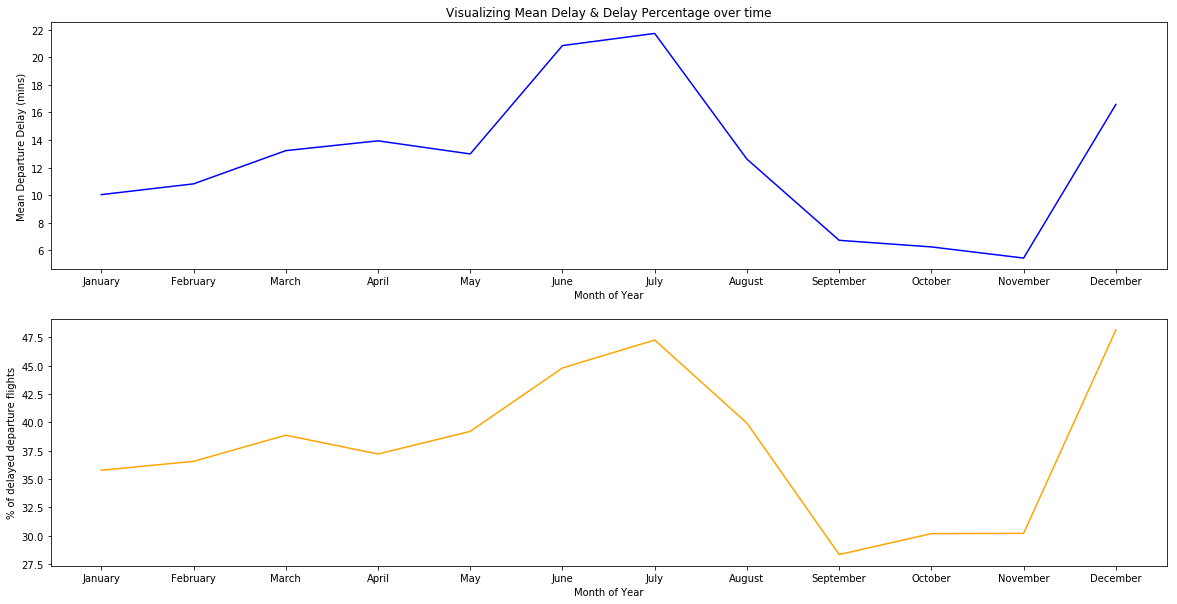

In [18]:
%matplotlib inline

#Prepare the data
data_df= monthly_df
x  = data_df['month'].values
y1 = data_df['dep_delay'].values
y2 =(data_df['numDepDelayed']*100).values

#Create month_labels (To be used later as well)
month_labels=np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Initialize the plot
fig = plt.figure(figsize=(20,10))

#Prepare SubPlot for Mean delay across months
ax1 = fig.add_subplot(211)
ax1.set_title('Visualizing Mean Delay & Delay Percentage over time')
plt.xticks(x, month_labels)  #Show month names instead of numbers

#Prepare SubPlot for Mean Delay Percentage across months
ax2 = fig.add_subplot(212)
plt.xticks(x, month_labels)  #Show month names instead of numbers

# Plot the data
ax1.plot(x,y1, c='blue')
ax1.set_ylabel('Mean Departure Delay (mins)')
ax1.set_xlabel('Month of Year')

ax2.plot(x,y2, c='orange')
ax2.set_ylabel('% of delayed departure flights')
ax2.set_xlabel('Month of Year')

# Show the plot
plt.show()


#### Explanation 
Yes, the data does seem seasonal !

When it comes to average delay time, the highest departure delay times are to be expected in Summer & December season July,  June, December, August and May. The lowest departure delay times are during Fall (November, October, and September)

The proportion of flights that are delayed also follows a similar pattern , being high in December, with 48% of December flights getting delayed, followed by summer months of July, June and May.  The least proportion of flights get delayed during September,October and November. 

#### (d) On average, how do departure delays vary over the course of a day?

In [19]:
flights_df.ix[:, ['hour','dep_delay']]
print('Hour 24: ',len(flights_df.loc[flights_df.hour == 24]))
print('Hour  0: ',len(flights_df.loc[flights_df.hour == 0]))

Hour 24:  29
Hour  0:  881


#### Minor Issue with Data
There are 29 flights that seem to have hour 24, and 881 departing at hour 0.
Since both are equal 24:30 = 00:30, let's reassign the data.

In [20]:
#Reassign the flights with hour 24 to hour 0
#flights_df = pd.read_csv('flights.csv')
flights_df.loc[flights_df.hour == 24, 'hour'] = 0

print('Hour 24: ',len(flights_df.loc[flights_df.hour == 24]))
print('Hour  0: ',len(flights_df.loc[flights_df.hour == 0]))

Hour 24:  0
Hour  0:  910


In [21]:
#Create percent Delayed column from modified overall flights data
hourly_df= flights_df.ix[:, ['hour','dep_delay']]
hourly_df['numDepDelayed'] = np.where(delay_df['dep_delay'] > 0, 1, 0)

hourly_df = hourly_df.groupby(['hour'])['hour','dep_delay','numDepDelayed'].mean()
hourly_df['dep_delay'] = hourly_df['dep_delay'] 

hourly_df

,hour,dep_delay,numDepDelayed
hour,,,
0.0,0.0,126.609890,1.000000
1.0,1.0,207.049327,1.000000
2.0,2.0,239.921875,1.000000
3.0,3.0,304.727273,1.000000
4.0,4.0,-5.554098,0.000000
5.0,5.0,-4.355644,0.050787
6.0,6.0,-1.520552,0.181770
7.0,7.0,0.223289,0.207586
8.0,8.0,1.091432,0.234257


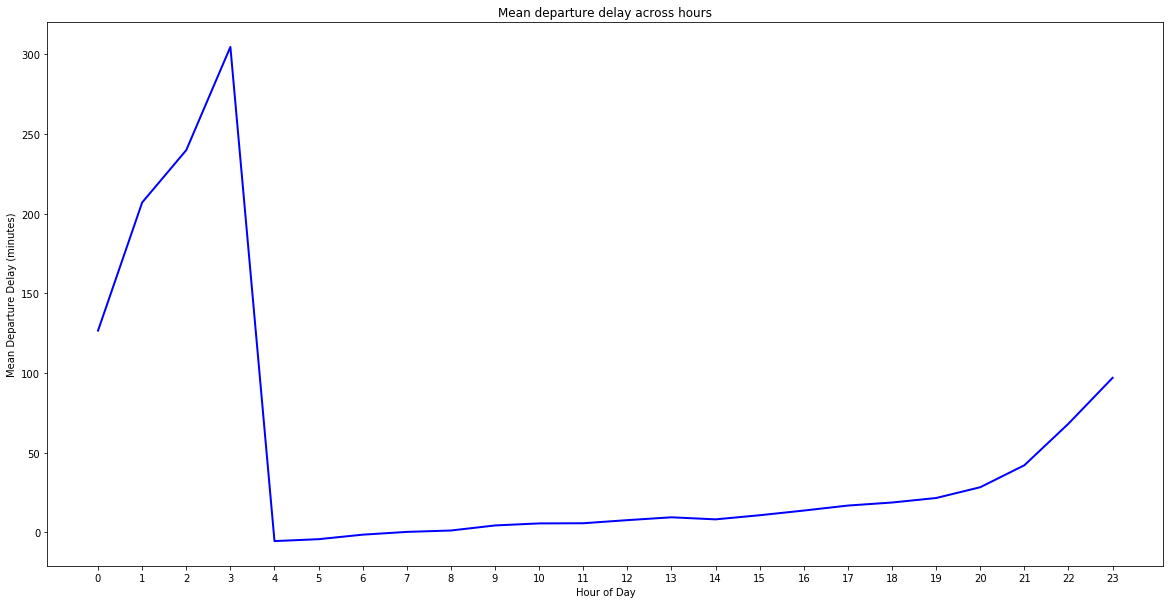

In [22]:
%matplotlib inline
#Prepare the data
x=hourly_df['hour'].values
y=hourly_df['dep_delay'].values

#Initialize the plot
fig = plt.figure(figsize=(20,10))

plt.xlabel('Hour of Day')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean departure delay across hours')
plt.xticks(x) #To make all hours 1-23 appear as ticks on x axis

#Plot the data
plt.plot(x,y, linewidth=2, c='blue')

#### Explanation 
There seems to be a pattern in delay across time!

The average delay time is the largest for flights departing post midnight (3 AM, 2 AM, 1 AM). The departure delay then drops steeply, and slowly and steadily increases from being the lowest in the early morning across the afternoon, evening and peaks in the night time. the delays are very small in the early hours of the morning, i.e. starting from 4 AM, 5 AM, 6 AM until noon almost, which seems to suggest that the efficiency of the airports is high at these times. One possible reason for this could be that there is a higher amount of staff to take care of flights starting 4 AM or more efficient carriers fly in the mornings, and the red eye flights may not be serviced by many staffers, or the carriers that operate late night tend to be associated with larger delays.

## Question 3 - Fastest Flyer
#### Which flight departing NYC in 2013 flew the fastest?

In [23]:
# Calculate speed as distance / air_time
flights_df['speed']=flights_df['distance']*60/flights_df['air_time']
flights_df= flights_df.sort_values(by='speed', ascending=False)
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,703.384615
251999,252000,2013,7,2,1558.0,45.0,1745.0,26.0,EV,N17196,4667,EWR,MSP,93.0,1008,15.0,58.0,650.322581
205388,205389,2013,5,13,2040.0,15.0,2225.0,-1.0,EV,N14568,4292,EWR,GSP,55.0,594,20.0,40.0,648.000000
157516,157517,2013,3,23,1914.0,4.0,2045.0,2.0,EV,N12567,3805,EWR,BNA,70.0,748,19.0,14.0,641.142857
10223,10224,2013,1,12,1559.0,-1.0,1849.0,-28.0,DL,N956DL,1902,LGA,PBI,105.0,1035,15.0,59.0,591.428571


#### Explanation
The Delta Airlines flight 1499  (Tail number N666DN) from La Guardia (LGA) to Atlanta (ATL) flew a distance of 762 miles with an average speed of 11.72 miles/min (703.38 mph) for an air time of 65 minutes on 25th May 2013.

## Question 4 - Daily Flyers
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [24]:
# Filter out daily flights
daily_flights_df = flights_df.ix[: , ['carrier','flight','dest']]
daily_flights_df['numTotal']=1

daily_flights_df= daily_flights_df.groupby(['carrier','flight','dest']).sum()
daily_flights_df[daily_flights_df['numTotal']==365]

numTotal
carrier flight dest          
AA      59     SFO        365
        119    LAX        365
        181    LAX        365
        1357   SJU        365
        1611   MIA        365
B6      219    CLT        365
        359    BUR        365
        371    FLL        365
        431    SRQ        365
        703    SJU        365
        1783   MCO        365
DL      2159   MCO        365
        2391   TPA        365
EV      5712   IAD        365
UA      15     HNL        365
VX      251    LAS        365
        407    LAX        365
        413    LAX        365

#### Explanation  
There are 18 flights that run daily.

The 13 unique destinations include:
MIA, SJU, LAX, 
CLT, HNL, BUR,
FLL, SRQ, MCO,
IAD, LAS, SFO,
TPA

## Question 5 - Research Question- Influence of airport choice on departure delay (monthly, hourly)

#### Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


#### The Research Question
> How do the mean hourly and monthly departure delay vary, as a function of the NYC airport ? In other words, how does the choice of airport (LGA, EWR, JFK) influence the expected monthly and hourly departure delay?

Why this question?
- This question is useful to answer because as a consumer with just a printed out ticket that tells me which  NYC airport, and what time the flight leaves, I can anticipate the expected departure delay based on the month and hour of departure.  
- At the least, knowing the "best" airport to avoid departure delays might be, will refine my flight searches in the future.
- It is reasonable to expect that the departure delay depends on the staff, and flights being serviced at a particular origin airport.


The main aspects of departure delay I want to explore are-
- Mean delay time (minutes) , i.e. how much later should I expect my flight to leave? (Primary)
- Mean delay percentage , i.e. what is the probability of my flight being delayed?    (Secondary)
 
Both of these aspects were calculated overall in previous questions, but the data was not parsed based on the origin.



#### Steps in Analysis
1. Find overall variation in mean departure delay across airports (EWR, LGA, JFK) - with Boxplot
2. If results seem interesting, continue.
3. Analyze overall variation in mean monthly departure delay across airports (EWR, LGA, JFK) - with Scatter
4. Analyze overall variation in mean hourly departure delay across airports (EWR, LGA, JFK) - with Scatter
5. Test results for steps 3 and 4 for statistical significance ( To be done later)
6. Discuss

#### Mean Departure Delay - Overall

In [25]:
#Calculate overall Delay

#Fetch month, hour and origin delay records from overall flights data - For further analysis
data_df=flights_df.ix[:,['month','hour','dep_delay','origin']]
data_df['numDelayed'] = np.where(data_df['dep_delay'] > 0, 1, 0)  #Additional column to calculate delay percent
data_df.loc[data_df.hour == 24, 'hour'] = 0   #Reassigned hour 24 to hour 0

#Aggregate overall data for Airport
overall_data_df = data_df.groupby(['origin'], as_index=False)['dep_delay','origin','numDelayed'].mean()
overall_data_df['numDelayed'] = overall_data_df['numDelayed']*100  

print('Snapshot of Overall delays per Airport\n')
print( overall_data_df.to_string(formatters={'numDelayed':'{:,.2f}%'.format}))


Snapshot of Overall delays per Airport

  origin  dep_delay numDelayed
0    EWR  15.107954     43.62%
1    JFK  12.112159     37.77%
2    LGA  10.346876     32.19%


Seems like we are on the right track, there is a seemingly big difference in the average delay percentage and departure delay times across the airports.

- The best airport in 2013 was La Guardia with least % of delays (32.2%), and least average delay time of 10 mins.
- The worst airport in 2013 was Newark with 43.62% flights running delayed, and average delay time of 15 minutes.

Let's see if these trends hold throughout the year, and throughout a single day as well!

Let's plot the data across months & hours of the day!

#### Statistical significance Tests & Box Plots (To be completed later)

In [26]:
#from scipy import stats
#F, p = stats.f_oneway(overall_data_df['ctrl'], overall_data_df['trt1'], overall_data_df['trt2'])

In [27]:
# Draw First BoxPlot
#fig, ax = plt.figure(figsize=(20,10))
#ax.boxplot(box_df['dep_delay'],by=box_df['origin'],  showfliers=False)
#a.title('Box Plot for Departure Delay (minutes) with Airport ')

In [28]:
# Draw Second BoxPlot
#fig = plt.figure(figsize=(20,10))
#plt.title('Box Plot for Departure Delay (minutes) with Airport ')
#box_df.boxplot(['numDelayed'],'origin',  showfliers=False)

#### Mean Departure Delay - Monthly

In [29]:
#Aggregate data for month
month_data_df = data_df.groupby(['month','origin'], as_index=False)['month','dep_delay','origin','numDelayed'].mean()
month_data_df['numDelayed'] = month_data_df['numDelayed']*100

print('Snapshot of Monthly delays per Airport\n')
print( month_data_df.head().to_string(formatters={'numDelayed':'{:,.2f}%'.format}))

Snapshot of Monthly delays per Airport

   month origin  dep_delay numDelayed
0      1    EWR  14.905748     44.22%
1      1    JFK   8.615826     33.77%
2      1    LGA   5.641560     27.58%
3      2    EWR  13.067263     41.39%
4      2    JFK  11.791355     37.17%


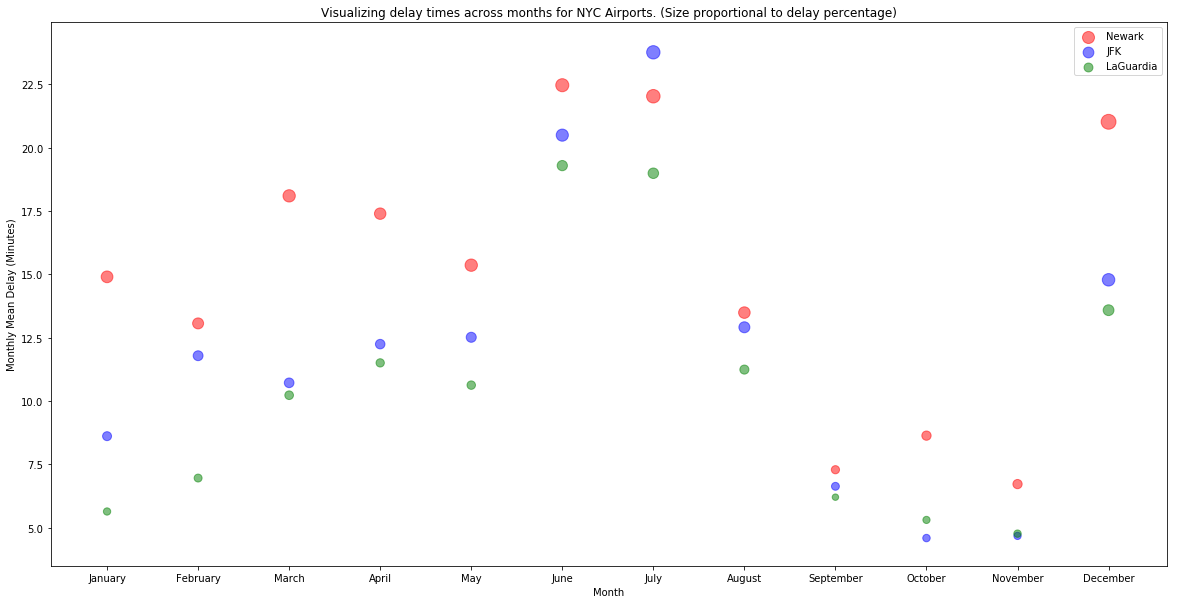

In [30]:
#PLOT for MONTHLY DELAY
#Create subsets of data
subset_ewr = month_data_df[month_data_df.origin=='EWR'].dropna()
subset_lga = month_data_df[month_data_df.origin=='LGA'].dropna()
subset_jfk = month_data_df[month_data_df.origin=='JFK'].dropna()

#Initialize the plot data
x1 = subset_ewr['month'].values
y1 = subset_ewr['dep_delay'].values
delays1 = subset_ewr['numDelayed'].values
area1 = np.pi * (0.15 * delays1)**2  # 0 to 15 point radii

x2 = subset_lga['month'].values
y2 = subset_lga['dep_delay'].values
delays2 = subset_lga['numDelayed'].values
area2 = np.pi * (0.15 * delays2)**2  # 0 to 15 point radii

x3 = subset_jfk['month'].values
y3 = subset_jfk['dep_delay'].values
delays3 = subset_jfk['numDelayed'].values
area3 = np.pi * (0.15 * delays3)**2  # 0 to 15 point radii

# Initialize the plot
fig = plt.figure(figsize=(20,10))
#fig = plt.figure(figsize=(20,10))
plt.title('Visualizing delay times across months for NYC Airports. (Size proportional to delay percentage)')

#Show month names instead of numbers 1-12, month_labels np.array created in 2 (c)
plt.xticks(x1, month_labels) 
plt.xticks(x2, month_labels)
plt.xticks(x3, month_labels)

plt.xlabel('Month')
plt.ylabel('Monthly Mean Delay (Minutes)')

#Plot the data
plt.scatter(x1, y1, s=area1, c='red',alpha=0.5, label='Newark')
plt.scatter(x3, y3, s=area3, c='blue',alpha=0.5, label='JFK')
plt.scatter(x2, y2, s=area2, c='green',alpha=0.5, label='LaGuardia')

plt.legend()
plt.show()

#### Plot Explanation - 1
- Y: Average Delay Time (Minutes)
- X: Over months of a year
- Size: Percent of flights delayed
- Colour: Which Airport?

**Observations**
- What we see is that overall, La Guardia (Green) consistently outperforms the other airports throughout the year!

- Laguardia has a smaller percentage of flights that are delayed throughout the year (smaller area circles) whereas Newark consistently has more delayed flights throughout the year (bigger circles).

- We see seasonality in all three airports with summer months and December seeing higher delays than rest of the months.

- An interesting observation is that except for summer months (June to September), Newark is significantly worse in terms of departure delays as opposed to both JFK, and La Guardia.  (Based on how close all three dots are for a month)
- JFK has the worst average delay time in July among the three airports, Newark is worse the other 11 months
- The monthly Average delay times for the airports range from 5 minutes to around 25 minutes across the year

In [31]:
#Aggregate data for hour
hour_data_df = data_df.groupby(['hour','origin'], as_index=False)['hour','dep_delay','origin','numDelayed'].mean()
hour_data_df['numDelayed'] = hour_data_df['numDelayed']*100

print('Snapshot of Hourly delays per Airport\n')
print( hour_data_df.head().to_string(formatters={'numDelayed':'{:,.2f}%'.format}))


Snapshot of Hourly delays per Airport

   hour origin   dep_delay numDelayed
0   0.0    EWR  208.121795    100.00%
1   0.0    JFK   82.676282    100.00%
2   0.0    LGA  239.676923    100.00%
3   1.0    EWR  269.000000    100.00%
4   1.0    JFK  161.007299    100.00%


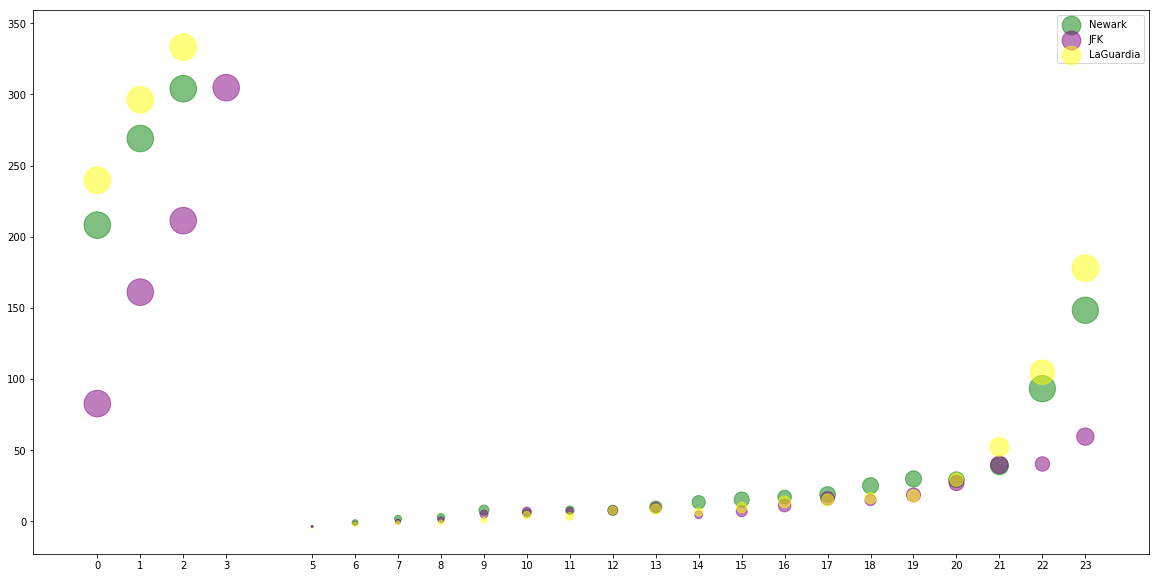

In [32]:
#PLOT for HOURLY DELAY
#Create subsets of data
subset_ewr = hour_data_df[hour_data_df.origin=='EWR'].dropna()
subset_lga = hour_data_df[hour_data_df.origin=='LGA'].dropna()
subset_jfk = hour_data_df[hour_data_df.origin=='JFK'].dropna()

#Prepare plot data
#EWR
x1 = subset_ewr['hour'].values
y1 = subset_ewr['dep_delay'].values
delays1 = subset_ewr['numDelayed'].values
area1 = np.pi * (0.15 * delays1)**2  # 0 to 15 point radii

#LGA
x2 = subset_lga['hour'].values
y2 = subset_lga['dep_delay'].values
delays2 = subset_lga['numDelayed'].values
area2 = np.pi * (0.15 * delays2)**2  # 0 to 15 point radii

#JFK
x3 = subset_jfk['hour'].values
y3 = subset_jfk['dep_delay'].values
delays3 = subset_jfk['numDelayed'].values
area3 = np.pi * (0.15 * delays3)**2  # 0 to 15 point radii

#Initialize Plot
fig = plt.figure(figsize=(20,10))
##Add xticks to make all hours visible

#Show all hours
plt.xticks(x1) 
plt.xticks(x2)
plt.xticks(x3)


#Plot the data
plt.scatter(x1, y1, s=area1, c='green',alpha=0.5, label='Newark')
plt.scatter(x3, y3, s=area3, c='purple',alpha=0.5, label='JFK')
plt.scatter(x2, y2, s=area2, c='yellow',alpha=0.5, label='LaGuardia')
plt.legend()

plt.show()


#### Plot Explanation - 2
- Y: Average Delay Time (Minutes) 
- X: Over hours of a day
- Size: Percent of flights delayed
- Colour: Which Airport?

** Shocking Observations**
- We now see that La guardia performs much worse in the late nights, starting 10PM, until 3 AM!
Seems like our positive image of La Guardia is being tested, as it shows significantly higher delay times.
- We see similar trends of increase and decrease in all three airports with mornings until evenings having fairly low delays.
- All the airports have higher percent of flight delays (larger size of circles) in the late night time period.
- An interesting observation is that except for summer months (June to September), Newark is much worse in terms of departure delays as opposed to both JFK, and La Guardia
- The hourly average delay times for the airports fluctuate strongly and almost 0 delay to many hours (200+ minutes) across the day
- An explanation for La Guardia having low monthly average delays but performing badly at night could be that most of the flights that it serves are in the morning to evening time, thus lowering the monthly average delays.


**Overall Confounding Factors**
Since we looked at the departure delays of flights with relation to each airport, there could be confounding factors such as number of flights serviced by the airport, kinds of carriers, and the operating staff at the airport. These factors are inherent in the analysis, and specific statistical testing can help parse out the significant factors. 


## Question 6 - Weather & Flights
#### What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

#### Expected Analysis
The weather data consists of weather recordings for a particular airport on an hourly basis for a day. 
Let's take the daily average of the weather data across hours, across all the airports, to get a daily weather profile for NYC. Similarly, we take the daily average of the mean delay time, and mean percent delay across all airports  to get a daily delay profile for NYC.

We can then combine these two datasets to perform correlation analysis. The only caveat is that since we aggregate the data over the airports, and the measured hours etc. the underlying influence of these will be a counfounding factor on top of other factors.

Steps:
1. Read Weather Data
2. Prune Weather Data to create one record per day in NYC
3. Prune Flights Data to create one record per day in NYC
4. Combine above two into single dataframe.
5. Plot correlation matrix
6. Discussion
7. Visually explore the strong associations

#### Read Weather Data

In [33]:
# Fetch Weather data
weather_df= pd.read_csv('weather.csv')
weather_df = pd.DataFrame(weather_df)  # Cast DataFrameGroupby object to DataFrame for easy analysis

In [34]:
print (weather_df.shape)
print (weather_df.columns)
print (weather_df.dtypes)

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object


#### Prune Weather data

In [35]:
weather_df.head()
daily_weather = weather_df.groupby(['year','month','day'],as_index=False)['year','month','day','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','visib'].mean()

In [36]:
#Remove useless Weather columns - Run only once per program!
del weather_df['origin']

In [37]:
daily_weather.head()

,year,month,day,dewp,humid,precip,pressure,temp,visib,wind_dir,wind_gust,wind_speed
0,2013,1.0,1.0,25.050435,58.386087,0.0,1012.442857,38.4800,10.0,263.043478,14.682397,12.758648
1,2013,1.0,2.0,11.382500,47.786250,0.0,1017.337500,28.8350,10.0,307.916667,14.401704,12.514732
2,2013,1.0,3.0,14.780000,54.395833,0.0,1021.058333,29.4575,10.0,276.956522,9.049346,7.863663
3,2013,1.0,4.0,19.205000,55.880417,0.0,1017.533333,33.4775,10.0,242.916667,15.946714,13.857309
4,2013,1.0,5.0,19.242500,49.284583,0.0,1021.120833,36.7325,10.0,271.666667,12.470441,10.836512


#### Prune Flight data

In [38]:
flights_df.head()
flight_delays= flights_df.ix[:, ['year','month','day','dep_delay']]

flight_delays['percentDelay'] = np.where(flight_delays['dep_delay'] > 0, 1, 0)
flight_delays['numTotal'] = 1

daily_planes = flight_delays.groupby(['year','month','day'], as_index=False).sum()
daily_planes['percentDelay'] = daily_planes['percentDelay'] *100 / daily_planes['numTotal']
daily_planes['dep_delay'] = daily_planes['dep_delay'] / daily_planes['numTotal']

daily_planes.head()

,year,month,day,dep_delay,percentDelay,numTotal
0,2013,1,1,11.494062,41.805226,842
1,2013,1,2,13.741251,47.720042,943
2,2013,1,3,10.867615,45.185996,914
3,2013,1,4,8.892896,42.732240,915
4,2013,1,5,5.708333,37.222222,720


In [39]:
#Remove useless Flights column
del daily_planes['numTotal']

#### Merge Weather and Flight data

In [40]:
combined = daily_planes.set_index(['year','month','day']).join(daily_weather.set_index(['year','month','day']))
combined.head()

dep_delay  percentDelay       dewp      humid  precip  \
year month day                                                          
2013 1     1    11.494062     41.805226  25.050435  58.386087     0.0   
           2    13.741251     47.720042  11.382500  47.786250     0.0   
           3    10.867615     45.185996  14.780000  54.395833     0.0   
           4     8.892896     42.732240  19.205000  55.880417     0.0   
           5     5.708333     37.222222  19.242500  49.284583     0.0   

                   pressure     temp  visib    wind_dir  wind_gust  wind_speed  
year month day                                                                  
2013 1     1    1012.442857  38.4800   10.0  263.043478  14.682397   12.758648  
           2    1017.337500  28.8350   10.0  307.916667  14.401704   12.514732  
           3    1021.058333  29.4575   10.0  276.956522   9.049346    7.863663  
           4    1017.533333  33.4775   10.0  242.916667  15.946714   13.857309  
           5    1021.120833  36.7325   10.0  271.666667  12.470441   10.836512

In [41]:
print('Correlation Matrix')
combined.corr(method='pearson')

Correlation Matrix


,dep_delay,percentDelay,dewp,humid,precip,pressure,temp,visib,wind_dir,wind_gust,wind_speed
dep_delay,1.000000,0.855149,0.327315,0.467365,0.364475,-0.271397,0.202168,-0.395745,-0.185927,-0.034584,-0.034584
percentDelay,0.855149,1.000000,0.234777,0.425631,0.353014,-0.256481,0.109889,-0.354262,-0.097867,0.010729,0.010729
dewp,0.327315,0.234777,1.000000,0.538505,0.115790,-0.310673,0.947855,-0.103490,-0.284759,-0.295837,-0.295837
humid,0.467365,0.425631,0.538505,1.000000,0.408797,-0.261423,0.246186,-0.673389,-0.466447,-0.283466,-0.283466
precip,0.364475,0.353014,0.115790,0.408797,1.000000,-0.191252,-0.009730,-0.462270,-0.154772,0.002506,0.002506
pressure,-0.271397,-0.256481,-0.310673,-0.261423,-0.191252,1.000000,-0.265133,0.122892,-0.255505,-0.253861,-0.253861
temp,0.202168,0.109889,0.947855,0.246186,-0.009730,-0.265133,1.000000,0.111572,-0.151778,-0.234153,-0.234153
visib,-0.395745,-0.354262,-0.103490,-0.673389,-0.462270,0.122892,0.111572,1.000000,0.348407,0.145128,0.145128
wind_dir,-0.185927,-0.097867,-0.284759,-0.466447,-0.154772,-0.255505,-0.151778,0.348407,1.000000,0.470056,0.470056
wind_gust,-0.034584,0.010729,-0.295837,-0.283466,0.002506,-0.253861,-0.234153,0.145128,0.470056,1.000000,1.000000


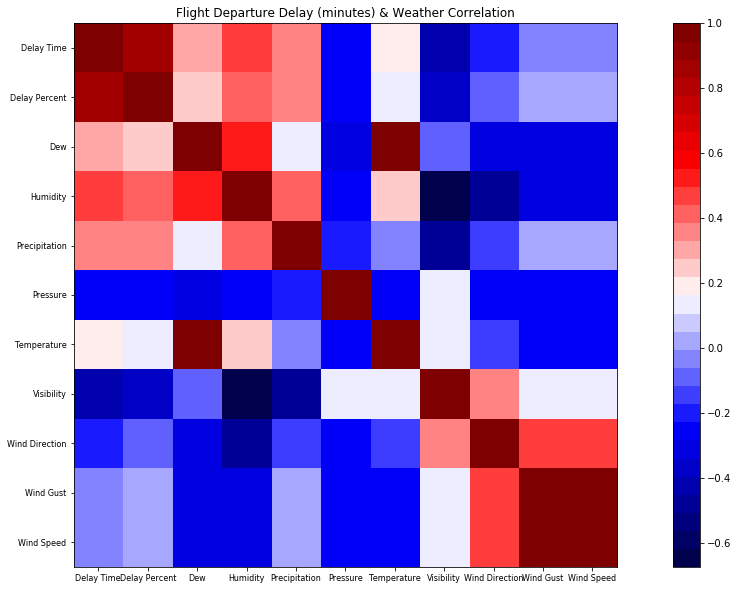

In [42]:
#PLOT Correlation Matrix

def correlation_matrix(df):
    from matplotlib import cm as cm

    #Prepare the data
    corr = df.corr()

    #Initialize Plot
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('seismic', 30)
    plt.title('Flight Departure Delay (minutes) & Weather Correlation')
    
    #Plot Data
    cax = ax1.imshow(corr, interpolation="nearest", cmap=cmap)
    
    # Make X & Y labels understandable
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);    
    labels=['Delay Time','Delay Percent','Dew','Humidity','Precipitation',
            'Pressure','Temperature','Visibility','Wind Direction','Wind Gust','Wind Speed']
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

    
correlation_matrix(combined)

#### Correlation Discussion
The correlation data suggests the following associations:

Factors **Positively Correlated**  with **Mean Departure Delay (minutes)**

- Humidity (0.467365)
- Precipitation (0.364475)
- Dew (0.327315)
- Temperature (0.202168)

The strongest positive associations are with Humidity and Precipitation, thus it seems like the delays are on average longer when flights take off in rainy weather.The mild association between temperature and dew suggest that days with higher dew and higher temperatures are associated with slightly longer flight delays on average.

Factors **Negatively Correlated**  with **Mean Departure Delay (minutes)**
- Visibility (-0.395745)
- Wind Direction (-0.185927)
- Pressure (-0.271397)

The strongest negative correlations are with Visibility and Pressure.
Thus, in conditions with higher visibility, and higher pressure, the flights on average, have shorter delay times in a day.

_Note:_
The correlations of the weather factors with the _percentage of delayed flights_ is similar, but shows weaker pearson coefficients. Thus the same weather attribute is associated more weakly with the delay percent as compared to the delay time.
Thus, since the correlation between departure delay and % delay is 0.855149, we can ignore the _% delay attribute_ from the data in favour of mean delay time 

#### Visual Exploration
Now that we know which weather factors are correlated with delays, let's look at the plotting the graphs for the same. 

#### Visualizing Negative Correlation Factors

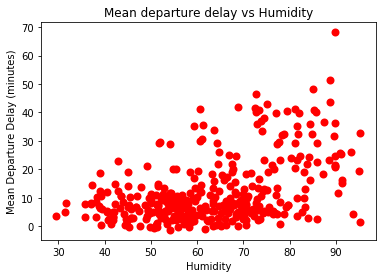

In [43]:
%matplotlib inline
#Prepare the data
combined= combined.dropna()
x=combined['humid'].values
y=combined['dep_delay'].values

#Initialize the plot
fig = plt.figure()

plt.xlabel('Humidity')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean departure delay vs Humidity')
#plt.xticks(x) #To make all values appear as ticks on x axis

#Plot the data
plt.scatter(x,y, linewidth=2, c='red')

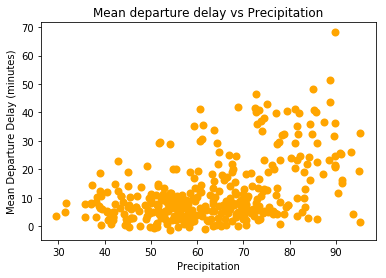

In [44]:
%matplotlib inline
#Prepare the data
combined= combined.dropna()
x=combined['humid'].values
y=combined['dep_delay'].values

#Initialize the plot
fig = plt.figure()

plt.xlabel('Precipitation')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean departure delay vs Precipitation')
#plt.xticks(x) #To make all values appear as ticks on x axis

#Plot the data
plt.scatter(x,y, linewidth=2, c='orange')

#### Visualizing Negative Correlation Factors

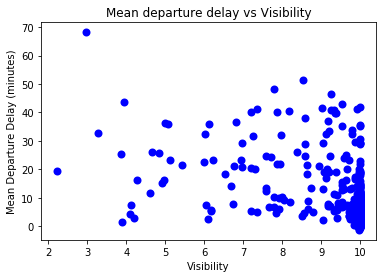

In [45]:
%matplotlib inline
#Prepare the data
combined= combined.dropna()
x=combined['visib'].values
y=combined['dep_delay'].values

#Initialize the plot
fig = plt.figure()

plt.xlabel('Visibility')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean departure delay vs Visibility')
#plt.xticks(x) #To make all values appear as ticks on x axis

#Plot the data
plt.scatter(x,y, linewidth=2, c='blue')

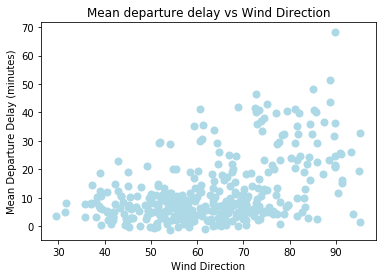

In [46]:
%matplotlib inline
#Prepare the data
combined= combined.dropna()
x=combined['humid'].values
y=combined['dep_delay'].values

#Initialize the plot
fig = plt.figure()

plt.xlabel('Wind Direction')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean departure delay vs Wind Direction')
#plt.xticks(x) #To make all values appear as ticks on x axis

#Plot the data
plt.scatter(x,y, linewidth=2, c='lightblue')

# THE END